In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.0


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  LabelEncoder

In [52]:
file = open('/content/gdrive/MyDrive/Training Data.csv')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
        if i == 0:
            continue
        line = line.split(',')
        l = len(line[3])
        line[3] = line[3][:l-1]
        temp = [line[0], line[1], line[2], line[3]]
        processedList.append(temp)

In [53]:
processedList

[['Distracted', '1.2171', '-0.8719', '-0.7159'],
 ['Distracted', '0.4416', '-0.5735', '-1.0408'],
 ['Distracted', '0.3688', '-0.0624', '-1.79'],
 ['Distracted', '0.5882', '-0.3644', '-0.7419'],
 ['Distracted', '-1.0578', '1.231', '-2.5979'],
 ['Distracted', '-1.1539', '2.2054', '-1.8033'],
 ['Distracted', '-0.345', '1.1265', '-1.0818'],
 ['Distracted', '0.9527', '0.3892', '-0.4359'],
 ['Distracted', '-0.2095', '0.889', '0.259'],
 ['Distracted', '0.2053', '-0.3922', '0.4538'],
 ['Distracted', '-1.4718', '0.244', '1.2841'],
 ['Distracted', '-1.2923', '-0.7914', '1.8149'],
 ['Distracted', '0.3179', '-1.9065', '-0.069'],
 ['Distracted', '-1.0947', '-1.1271', '0.2488'],
 ['Distracted', '-0.1365', '-0.3381', '0.046'],
 ['Distracted', '-0.1985', '-1.2679', '-1.1472'],
 ['Distracted', '-0.2745', '0.4717', '-1.7627'],
 ['Distracted', '-0.2751', '0.2532', '-1.0481'],
 ['Distracted', '-0.1659', '0.2513', '-0.6699'],
 ['Distracted', '-0.5205', '0.2827', '-0.94'],
 ['Distracted', '0.5451', '-0.3011

In [54]:
columns = ['activity', 'ax', 'ay', 'az']

In [55]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,activity,ax,ay,az
0,Distracted,1.2171,-0.8719,-0.7159
1,Distracted,0.4416,-0.5735,-1.0408
2,Distracted,0.3688,-0.0624,-1.79
3,Distracted,0.5882,-0.3644,-0.7419
4,Distracted,-1.0578,1.231,-2.5979


In [56]:
data.shape

(22796, 4)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22796 entries, 0 to 22795
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   activity  22796 non-null  object
 1   ax        22796 non-null  object
 2   ay        22796 non-null  object
 3   az        22796 non-null  object
dtypes: object(4)
memory usage: 712.5+ KB


In [58]:
data['activity'].value_counts()

Distracted    7764
Drunk         7531
Normal        7501
Name: activity, dtype: int64

In [59]:
data['ax'] = data['ax'].astype('float')
data['ay'] = data['ay'].astype('float')
data['az'] = data['az'].astype('float')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22796 entries, 0 to 22795
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  22796 non-null  object 
 1   ax        22796 non-null  float64
 2   ay        22796 non-null  float64
 3   az        22796 non-null  float64
dtypes: float64(3), object(1)
memory usage: 712.5+ KB


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=200)


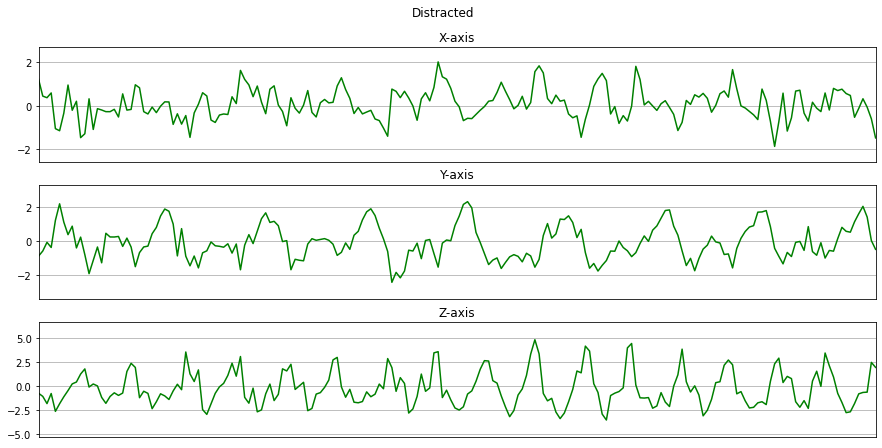

Int64Index([6500, 6501, 6502, 6503, 6504, 6505, 6506, 6507, 6508, 6509,
            ...
            6690, 6691, 6692, 6693, 6694, 6695, 6696, 6697, 6698, 6699],
           dtype='int64', length=200)


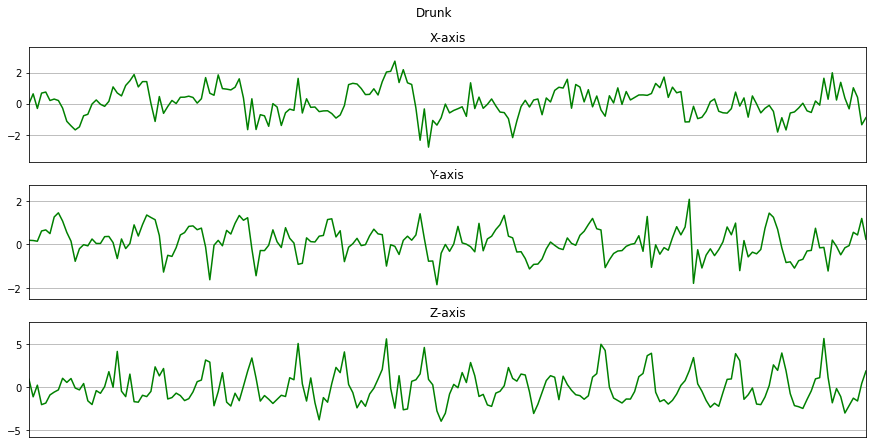

Int64Index([13001, 13002, 13003, 13004, 13005, 13006, 13007, 13008, 13009,
            13010,
            ...
            13191, 13192, 13193, 13194, 13195, 13196, 13197, 13198, 13199,
            13200],
           dtype='int64', length=200)


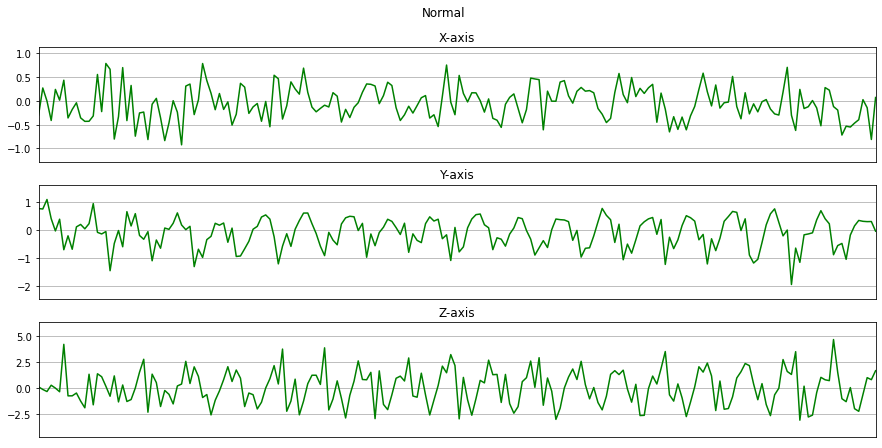

In [61]:
Fs = 20
activities = data['activity'].value_counts().index
def plot_activity(activity, data):
    print(data.index)
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 7), sharex = True)
    plot_axis (ax0, data.index, data['ax'], 'X-axis')
    plot_axis (ax1, data.index, data['ay'], 'Y-axis')
    plot_axis (ax2, data.index, data['az'], 'Z-axis')
    plt.subplots_adjust(hspace = 0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top = 0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g');
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
for activity in activities: 
    data_for_plot = data[data['activity'] == activity][:Fs*10]
    plot_activity(activity, data_for_plot)

In [62]:
df = data
df.head()

,activity,ax,ay,az
0,Distracted,1.2171,-0.8719,-0.7159
1,Distracted,0.4416,-0.5735,-1.0408
2,Distracted,0.3688,-0.0624,-1.7900
3,Distracted,0.5882,-0.3644,-0.7419
4,Distracted,-1.0578,1.2310,-2.5979


In [63]:
Distracted = df[df['activity'] == 'Distracted'].copy()
Drunk = df[df['activity'] == 'Drunk'].copy()
Normal = df[df['activity'] == 'Normal'].copy()

In [64]:
balanced_data = df
balanced_data.shape

(22796, 4)

In [65]:
balanced_data.head()

,activity,ax,ay,az
0,Distracted,1.2171,-0.8719,-0.7159
1,Distracted,0.4416,-0.5735,-1.0408
2,Distracted,0.3688,-0.0624,-1.7900
3,Distracted,0.5882,-0.3644,-0.7419
4,Distracted,-1.0578,1.2310,-2.5979


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data

,activity,ax,ay,az,label
0,Distracted,1.2171,-0.8719,-0.7159,0
1,Distracted,0.4416,-0.5735,-1.0408,0
2,Distracted,0.3688,-0.0624,-1.7900,0
3,Distracted,0.5882,-0.3644,-0.7419,0
4,Distracted,-1.0578,1.2310,-2.5979,0
...,...,...,...,...,...
22791,Normal,1.2224,0.0378,-0.4226,2
22792,Normal,1.2245,-0.6322,0.3700,2
22793,Normal,1.3598,-0.1283,-0.6651,2
22794,Normal,0.8097,0.6830,-0.7794,2


In [68]:
label.classes_

array(['Distracted', 'Drunk', 'Normal'], dtype=object)

In [69]:
### Standardised data

In [70]:
X = balanced_data[['ax', 'ay', 'az']]
y = balanced_data['label']

In [71]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data = X, columns = ['ax', 'ay', 'az'])
scaled_X['label'] = y.values

scaled_X

,ax,ay,az,label
0,0.960997,-0.638312,-0.335892,0
1,0.324184,-0.377135,-0.486143,0
2,0.264404,0.070210,-0.832611,0
3,0.444567,-0.194118,-0.347916,0
4,-0.907068,1.202268,-1.206226,0
...,...,...,...,...
22791,0.965349,0.157910,-0.200255,2
22792,0.967073,-0.428512,0.166284,2
22793,1.078177,0.012530,-0.312400,2
22794,0.626455,0.722627,-0.365258,2


In [72]:
### Frame Preparation

In [73]:
import scipy.stats as stats

In [74]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2

In [75]:
def get_frames(df, frame_size, hop_size):
    N_FEATURES = 3
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['ax'].values[i: i+frame_size]
        y = df['ay'].values[i: i+frame_size]
        z = df['az'].values[i: i+frame_size]
        
        label = stats.mode(df['label'][i: i+frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES);
    labels = np.asarray(labels)
    
    return frames, labels

In [76]:
scaled_X
x, y = get_frames(scaled_X, frame_size, hop_size)

In [77]:
x.shape, y.shape

((568, 80, 3), (568,))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0, stratify = y)

In [79]:
X_train.shape, X_test.shape

((511, 80, 3), (57, 80, 3))

In [80]:
X_train = X_train.reshape(511, 80, 3, 1)
X_test = X_test.reshape(57, 80, 3, 1)

In [81]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [82]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))
model.add(Conv2D(32, (2, 2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'softmax'))

In [83]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [84]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 1.3594 - accuracy: 0.3327 - val_loss: 1.0798 - val_accuracy: 0.4912
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.1117 - accuracy: 0.4188 - val_loss: 1.0067 - val_accuracy: 0.5088
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0128 - accuracy: 0.5029 - val_loss: 0.9513 - val_accuracy: 0.5965
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8844 - accuracy: 0.6086 - val_loss: 0.9259 - val_accuracy: 0.5614
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8268 - accuracy: 0.6869 - val_loss: 0.8850 - val_accuracy: 0.5789
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7508 - accuracy: 0.6849 - val_loss: 0.8037 - val_accuracy: 0.6491
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6294 - accuracy: 0.7573 - val_loss: 0.8476 - val_accuracy: 0.5614
Epoch 8/20
16

In [85]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpuqqzalxp/assets


INFO:tensorflow:Assets written to: /tmp/tmpuqqzalxp/assets


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
